# Homework 04: Non-Parametric Regression
## Kerem Girenes
### April 8, 2022

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

def safelog(x):
    return(np.log(x + 1e-100))

## Import Data

In [2]:
train_data = np.genfromtxt("hw04_data_set_train.csv", delimiter = ",")
test_data = np.genfromtxt("hw04_data_set_test.csv", delimiter = ",")

K = np.max(train_data[:, 1])
N = train_data.shape[0]

print(K)
print(N)

1.82
180


## Regressogram Parameters

In [3]:
bin_width = 0.1
origin = 0.0

max_xtrain = np.max(train_data[:, 0])

#bins = []
#for i in range(origin, max_xtrain, bin_width):
#    bins = np.append(bins, bin_width*i)
## use np.arange instead

# leftmost locations of each bin
bins = np.arange(origin, max_xtrain, bin_width)
# right border of last bin added
bins = np.append(bins, max_xtrain)
print(bins)

[0.       0.1      0.2      0.3      0.4      0.5      0.6      0.7
 0.8      0.9      1.       1.1      1.2      1.3      1.4      1.5
 1.6      1.7      1.8      1.9      1.988889]


## Learn Regressogram

In [4]:
def regressogram_g(x, dataset):
    tot = 0
    div = 0
    for i in range(len(dataset[:, 0])):
        if(bins[x] <= dataset[i, 0] and dataset[i, 0] <= bins[x+1]):
            tot += dataset[i, 1]
            div += 1           
    return tot/div

y_pred=[]
for x in range(len(bins)-1):
    y_pred = np.append(y_pred, regressogram_g(x, train_data))

## Plot Regressogram

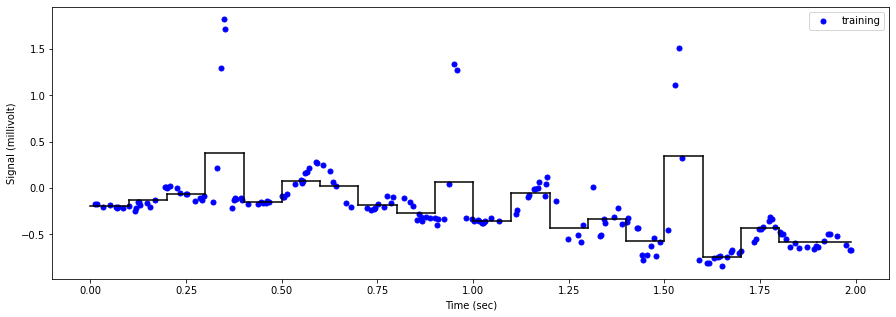

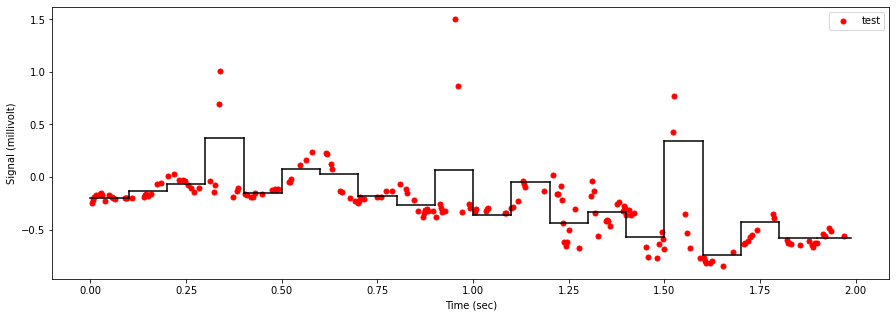

In [5]:
# Figure 1
plt.figure(figsize=(15, 5))

# Draw training points
plt.plot(train_data[:, 0], train_data[:, 1], "b.", markersize=10, label='training')

# Draw regressogram
# horizontal
for i in range(len(bins) - 1):
    plt.plot([bins[i], bins[i + 1]], [y_pred[i], y_pred[i]], "k-")
# vertical
for i in range(len(bins) - 2):
    plt.plot([bins[i + 1], bins[i + 1]], [y_pred[i], y_pred[i + 1]], "k-")
    
plt.xlabel("Time (sec)")
plt.ylabel("Signal (millivolt)")
plt.legend(loc='upper right')
plt.show()


# Figure 2
plt.figure(figsize=(15, 5))

# Draw test points
plt.plot(test_data[:, 0], test_data[:, 1], "r.", markersize=10, label='test')

# Draw regressogram
# horizontal
for i in range(len(bins) - 1):
    plt.plot([bins[i], bins[i + 1]], [y_pred[i], y_pred[i]], "k-")
# vertical
for i in range(len(bins) - 2):
    plt.plot([bins[i + 1], bins[i + 1]], [y_pred[i], y_pred[i + 1]], "k-")
    
plt.xlabel("Time (sec)")
plt.ylabel("Signal (millivolt)")
plt.legend(loc='upper right')
plt.show()

## Calculate the RMSE of Regressogram

In [6]:
rmse = 0
for i in range(test_data.shape[0]):
    for j in range(len(bins)):
        if(bins[j] <= test_data[i, 0] and test_data[i, 0] <= bins[j+1]):
            rmse += (train_data[i, 1] - y_pred[int((test_data[i, 1] - origin) / bin_width)]) ** 2
rmse = np.sqrt(rmse/test_data.shape[0])

print("Regressogram => RMSE is ", rmse, " when h is ", bin_width)

Regressogram => RMSE is  0.5228554628955486  when h is  0.1


## Running Mean Smoother

In [7]:
# use same bin width

data_interval = np.arange(origin, max_xtrain, 10e-4)

def mean_smoother_g(x, dataset):
    tot = 0
    div = 0
    for i in range(len(dataset[:, 0])):
        if (np.abs((x - dataset[i, 0]) / bin_width) <= 0.5):
            tot += dataset[i, 1]
            div += 1
    return tot/div

y_pred=[]
for x in data_interval:
    y_pred = np.append(y_pred, mean_smoother_g(x, train_data))

## Plot Running Mean Smoother

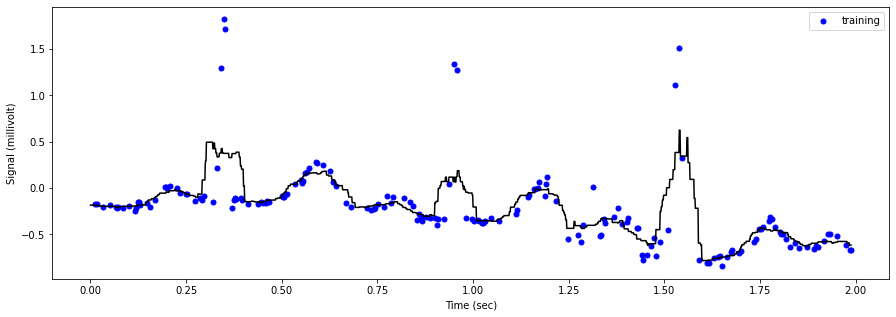

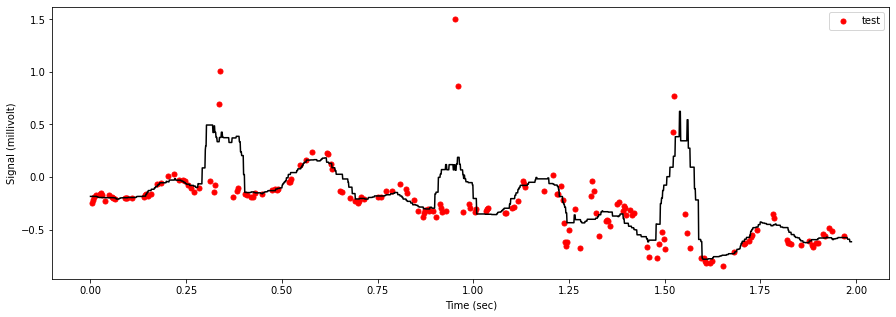

In [8]:
plt.figure(figsize=(15, 5))
plt.plot(train_data[:, 0], train_data[:, 1], "b.", markersize=10, label='training')
plt.plot(data_interval, y_pred, "k")
plt.xlabel("Time (sec)")
plt.ylabel("Signal (millivolt)")
plt.legend(loc='upper right')
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(test_data[:, 0], test_data[:, 1], "r.", markersize=10, label='test')
plt.plot(data_interval, y_pred, "k")
plt.xlabel("Time (sec)")
plt.ylabel("Signal (millivolt)")
plt.legend(loc='upper right')
plt.show()

## Calculate the RMSE of Running Mean Smoother

In [9]:
rmse = 0
for i in range(test_data.shape[0]):
    for j in range(len(bins)):
        if(bins[j] <= test_data[i, 0] and test_data[i, 0] <= bins[j+1]):
            rmse += (train_data[i, 1] - y_pred[int((test_data[i, 1] - origin) / 10e4)]) ** 2         
rmse = np.sqrt(rmse/test_data.shape[0])

print("Running Mean Smoother => RMSE is ", rmse, " when h is ", bin_width)

Running Mean Smoother => RMSE is  0.42527088997615525  when h is  0.1


## Kernel Smoother

In [10]:
bin_width = 0.02

def kernel_smoother_g(x, dataset):
    tot = 0
    div = 0
    for i in range(len(dataset[:, 0])):
        k = (1.0 / np.sqrt(2 * np.pi)) * np.exp(- (((x - dataset[i, 0]) / bin_width) ** 2) / 2)
        tot += k * dataset[i, 1]
        div += k
    return tot/div

y_pred=[]
for x in data_interval:
    y_pred = np.append(y_pred, kernel_smoother_g(x, train_data))

## Plot Kernel Smoother

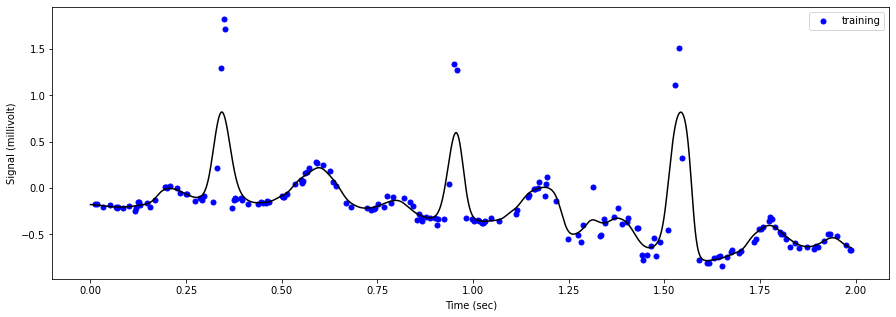

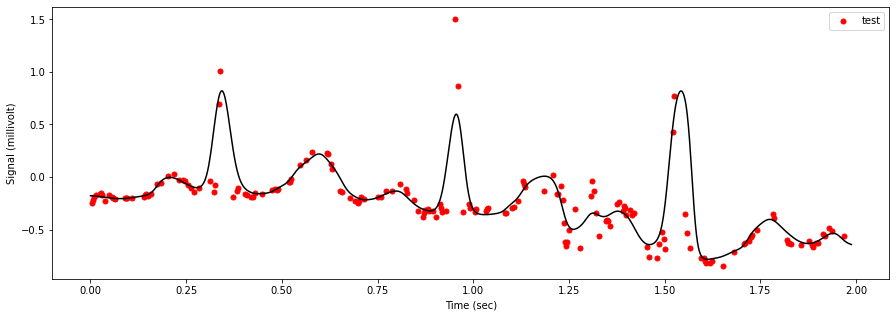

In [11]:
plt.figure(figsize=(15, 5))
plt.plot(train_data[:, 0], train_data[:, 1], "b.", markersize=10, label='training')
plt.plot(data_interval, y_pred, "k")
plt.xlabel("Time (sec)")
plt.ylabel("Signal (millivolt)")
plt.legend(loc='upper right')
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(test_data[:, 0], test_data[:, 1], "r.", markersize=10, label='test')
plt.plot(data_interval, y_pred, "k")
plt.xlabel("Time (sec)")
plt.ylabel("Signal (millivolt)")
plt.legend(loc='upper right')
plt.show()

## Calculate the RMSE of Kernel Smoother

In [12]:
rmse = 0
for i in range(test_data.shape[0]):
    for j in range(len(bins)):
        if(bins[j] <= test_data[i, 0] and test_data[i, 0] <= bins[j+1]):
            rmse += (train_data[i, 1] - y_pred[int((test_data[i, 1] - origin) / 10e4)]) ** 2         
rmse = np.sqrt(rmse/test_data.shape[0])

print("Kernel Smoother => RMSE is ", rmse, " when h is ", bin_width)

Kernel Smoother => RMSE is  0.4258090538683074  when h is  0.02
